This file analyses the output FST.py (10 .weir.fst files) and creates plots for each, and finding the significant segments within a sliding-window FST.

#### 0) Load library

In [4]:
# Libraries
library(ggplot2)
library(tidyverse)

#### 1) Calculate sliding window

In [5]:
sliding_window_fst <- function(vcf_file_name){
    # Reading in and filtering the file
    fst <- read_tsv(paste("../step1/", vcf_file_name, sep=""))
    fst <- na.omit(fst)
    
    # Sliding window FST
    n_sites <- nrow(fst) # counting number of sites in the vcf file
    n_windows <- floor((n_sites - 100)/20) + 1 # finds the number of windows to be examined
    
    window_start <- seq(1, n_sites - 100 + 1, by = 20) # creates a sequence of starting positions for the sliding windows
    window_end <- window_start + 100 - 1 # creates a list of end positions for the sliding windows
    
    fst_window <- data.frame(matrix(ncol = 4, nrow = n_windows)) # creates an empty data-frame structure for FST results
    colnames(fst_window) <- c("chromosome", "window_start", "window_end", "mean_fst") # gives the dataframe column names
    
    for (i in 1:n_windows) {
        fst_window$chromosome[i] <- fst$CHROM[window_start[i]] # transfers the chromosome number from the original file to the dataframe
        fst_window$window_start[i] <- fst$POS[window_start[i]] # transfers the starting-position from the original file to the dataframe
        fst_window$window_end[i] <- fst$POS[window_end[i]] # transfers the end-position from the original file to the dataframe
        fst_window$mean_fst[i] <- mean(fst$WEIR_AND_COCKERHAM_FST[window_start[i]:window_end[i]]) # calculates the mean fst within the sliding window
    }
    
    fst_window <- fst_window  %>% mutate(mean_fst = ifelse (mean_fst < 0, 0, mean_fst))
    
    return(fst_window)
}

#### 1) Save sliding window output files with a for loop

In [6]:
files <- c("FST_MSL_ESN.weir.fst",
          "FST_GWD_ESN.weir.fst",
          "FST_GWD_MSL.weir.fst",
          "FST_LWK_ESN.weir.fst",
          "FST_LWK_MSL.weir.fst",
          "FST_LWK_GWD.weir.fst",
          "FST_YRI_ESN.weir.fst",
          "FST_YRI_MSL.weir.fst",
          "FST_YRI_GWD.weir.fst",
          "FST_YRI_LWK.weir.fst")

In [7]:
out_files <- list()

for(i in 1:10) {
  vcf_file <- files[i]
    pop1 <- substr(files[i],5,7)
    pop2 <- substr(files[i],9,11)
    fst_window <- sliding_window_fst(vcf_file)
    out_name <- paste(pop1, pop2, sep="_")
    assign(out_name, fst_window)
    out_files[length(out_files) + 1] <- out_name
}

print(out_files)

Rows: 206423 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): CHROM, POS, WEIR_AND_COCKERHAM_FST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 206423 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): CHROM, POS, WEIR_AND_COCKERHAM_FST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 206423 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): CHROM, POS, WEIR_AND_COCKERHAM_FST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 206423 Columns: 3
── Column specif

[[1]]
[1] "MSL_ESN"

[[2]]
[1] "GWD_ESN"

[[3]]
[1] "GWD_MSL"

[[4]]
[1] "LWK_ESN"

[[5]]
[1] "LWK_MSL"

[[6]]
[1] "LWK_GWD"

[[7]]
[1] "YRI_ESN"

[[8]]
[1] "YRI_MSL"

[[9]]
[1] "YRI_GWD"

[[10]]
[1] "YRI_LWK"



#### 2) Make an FST histogram to find 5% significance level

In [8]:
fst_df <- rbind(MSL_ESN, GWD_ESN, GWD_MSL, LWK_ESN, LWK_MSL, LWK_GWD, YRI_ESN, YRI_MSL, YRI_GWD, YRI_LWK)

fst_df$ID <- 1:nrow(fst_df)

dim(fst_df)

colnames(fst_df)

[1] 28633     5

[1] "chromosome"   "window_start" "window_end"   "mean_fst"     "ID"

In [9]:
quantile(fst_df$mean_fst, probs = c(.50, .75, .95, .995))

50%         75%         95%       99.5% 
0.004620669 0.007555643 0.013693397 0.023386589

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


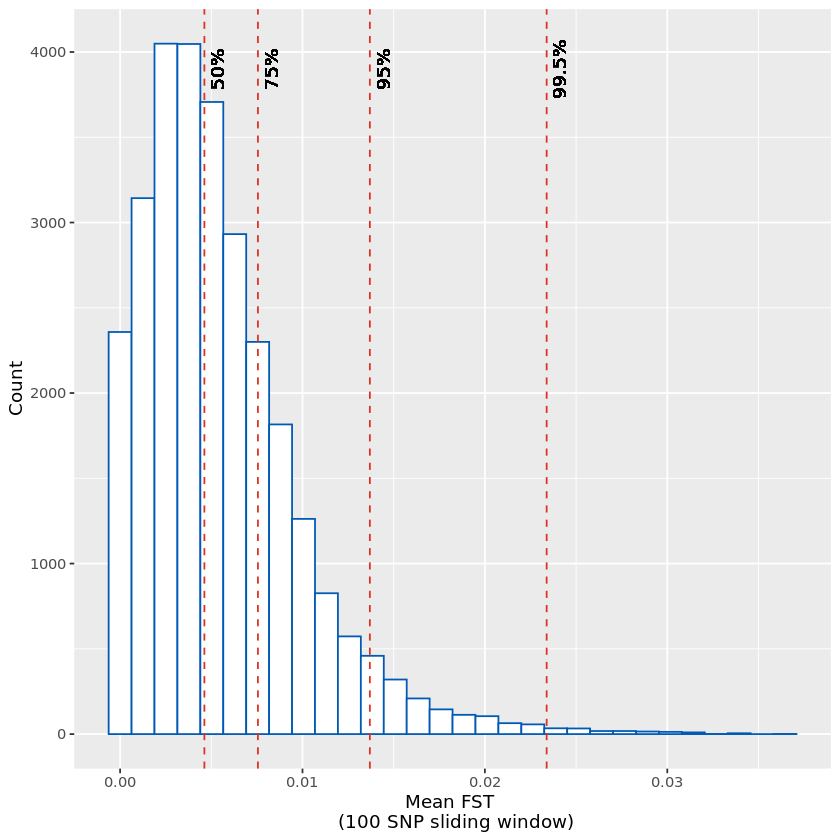

In [10]:
fst_hist <- ggplot(fst_df, aes(x=mean_fst)) + 
    geom_histogram(colour="#005AB5", fill="white") +
    geom_vline(xintercept = 0.00462066948000003, linetype = "dashed", color = "#DC3220") +
    geom_text(aes(x = 0.00462066948000003, y = 3900, label="\n50%"), angle=90) +
    geom_vline(xintercept = 0.00755564287, linetype = "dashed", color= "#DC3220") +
    geom_text(aes(x = 0.00755564287, y = 3900, label="\n75%"), angle=90) +
    geom_vline(xintercept = 0.0136933966528, linetype = "dashed", color = "#DC3220") +
    geom_text(aes(x = 0.0136933966528, y = 3900, label="\n95%"), angle=90) +
    geom_vline(xintercept = 0.0233865890232, linetype = "dashed", color = "#DC3220") +
    geom_text(aes(x = 0.0233865890232, y = 3900, label="\n99.5%"), angle=90) +
    ylab("Count") +
    xlab("Mean FST \n (100 SNP sliding window)")

print(fst_hist)

ggsave("fst_hist.pdf",
       plot = fst_hist,
       path = "../step1/FST_plots",
       device = "pdf",
       dpi = 300,
       units = "cm",
       width = 10,
       height = 10)

#### 3) Create FST plots that shows 5% significance

In [11]:
plot_fst <- function(fst_window_file, pops){
    
    fst_window_file$quantile <- ifelse(fst_window_file$mean_fst <= 0.0136933966528, 0,
                                      ifelse(fst_window_file$mean_fst <= 0.0233865890232, 1, 2))
    
    plot_name <- paste(pops, ".pdf", sep="")
    
    ggplot(data = fst_window_file, aes(x = window_start, y = mean_fst, colour = factor(quantile))) +
            geom_point() +
            geom_hline(yintercept = 0.0136933966528, linetype = "dashed", color = "#DC3220") +
            geom_hline(yintercept = 0.0233865890232, linetype = "dashed", color = "#DC3220") +
            scale_colour_manual(values = c("#000000", "#882255", "#CC6677")) +
            ylab("Mean FST") +
            xlab("Starting position") +
            theme(legend.position="none")
    
    ggsave(plot_name,
       plot = last_plot(),
       path = "../step1/FST_plots",
       device = "pdf",
       dpi = 300,
       units = "cm",
       width = 10,
       height = 10)
    
    
}

In [12]:
for(i in 1:10) {
  vcf_file <- files[i]
    pops <- substr(files[i], 5, 11)
    print(pops)
    fst_window <- sliding_window_fst(vcf_file)
    plot_fst(fst_window, pops)
}

[1] "MSL_ESN"


Rows: 206423 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): CHROM, POS, WEIR_AND_COCKERHAM_FST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "GWD_ESN"


Rows: 206423 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): CHROM, POS, WEIR_AND_COCKERHAM_FST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "GWD_MSL"


Rows: 206423 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): CHROM, POS, WEIR_AND_COCKERHAM_FST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "LWK_ESN"


Rows: 206423 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): CHROM, POS, WEIR_AND_COCKERHAM_FST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "LWK_MSL"


Rows: 206423 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): CHROM, POS, WEIR_AND_COCKERHAM_FST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "LWK_GWD"


Rows: 206423 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): CHROM, POS, WEIR_AND_COCKERHAM_FST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "YRI_ESN"


Rows: 206423 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): CHROM, POS, WEIR_AND_COCKERHAM_FST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "YRI_MSL"


Rows: 206423 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): CHROM, POS, WEIR_AND_COCKERHAM_FST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "YRI_GWD"


Rows: 206423 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): CHROM, POS, WEIR_AND_COCKERHAM_FST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "YRI_LWK"


Rows: 206423 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): CHROM, POS, WEIR_AND_COCKERHAM_FST

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
plot_fst(fst_df, "all")

In [20]:
high_fst <- fst_df %>% filter(mean_fst >= 0.0233865890232)

head(high_fst)

,chromosome,window_start,window_end,mean_fst,ID
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,3,46342439,46353556,0.02370309,2881
2,3,46345422,46355413,0.02380155,2882
3,3,51257986,51276702,0.02488167,4574
4,3,51262265,51278870,0.02575413,4575
5,3,51266542,51280747,0.02920229,4576
6,3,51269686,51283566,0.02965860,4577


Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


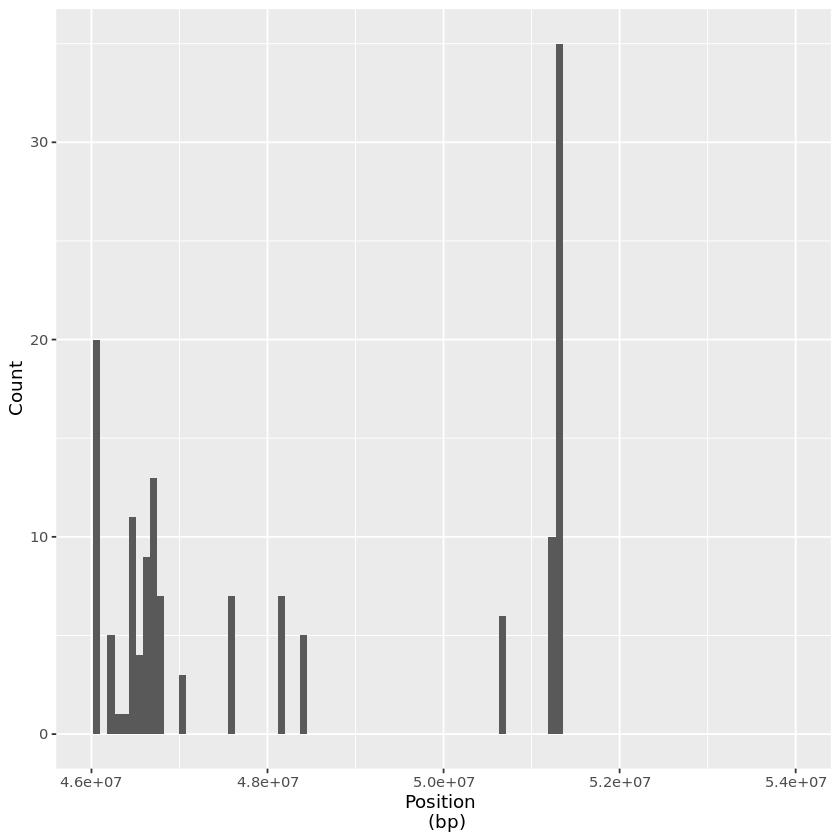

In [24]:
ggplot(high_fst, aes(x=window_start)) +
    geom_histogram(bins = 100) + 
    xlim(4.6e+07, 5.4e+07) +
    xlab("Position \n (bp)") +
    ylab("Count")

ggsave("high_FST_position.pdf",
    plot = last_plot(),
    path = "../step1/FST_plots",
    device = "pdf",
    dpi = 300,
    units = "cm",
    width = 20,
    height = 10)

In [25]:
write.csv(high_fst, "../step1/high_fst.csv", row.names=FALSE)

In [26]:
peak_fst <- fst_df %>% filter(window_start >= 5.1e+07, window_start <= 5.2e+07)

In [28]:
mean(peak_fst$window_start)

[1] 51506205